# PERCEPTRON

##### LOAD THE DATA

In [1]:
import numpy as np

# each row contains Sepal length in cm, Sepal width in nm and type (0|1)
# 0: Iris-setosa | 1: Iris-versicolor
data = np.loadtxt('iris-data.csv', delimiter=',')
data

array([[ 5.1,  3.5,  0. ],
       [ 4.9,  3. ,  0. ],
       [ 4.7,  3.2,  0. ],
       [ 4.9,  3. ,  0. ],
       [ 4.6,  3.1,  0. ],
       [ 4.6,  3.1,  0. ],
       [ 4.7,  3.2,  0. ],
       [ 4.6,  3.4,  0. ],
       [ 5.4,  3.9,  0. ],
       [ 5. ,  3.6,  0. ],
       [ 4.7,  3.2,  0. ],
       [ 4.7,  3.2,  0. ],
       [ 5.1,  3.5,  0. ],
       [ 4.4,  2.9,  0. ],
       [ 5. ,  3.4,  0. ],
       [ 5.4,  3.7,  0. ],
       [ 4.8,  3.4,  0. ],
       [ 4.8,  3. ,  0. ],
       [ 5.8,  4. ,  0. ],
       [ 4.8,  3.4,  0. ],
       [ 4.4,  2.9,  0. ],
       [ 5.1,  3.5,  0. ],
       [ 5.8,  4. ,  0. ],
       [ 4.4,  2.9,  0. ],
       [ 5.5,  2.3,  1. ],
       [ 5.4,  3.9,  0. ],
       [ 5.7,  3.8,  0. ],
       [ 5.4,  3.9,  0. ],
       [ 5.4,  3.9,  0. ],
       [ 5.4,  3.9,  0. ],
       [ 5.7,  4.4,  0. ],
       [ 4.8,  3.4,  0. ],
       [ 5.7,  2.8,  1. ],
       [ 4.7,  3.2,  0. ],
       [ 5.4,  3.7,  0. ],
       [ 4.9,  3.1,  0. ],
       [ 5.2,  2.7,  1. ],
 

##### VISUALIZE THE DATA

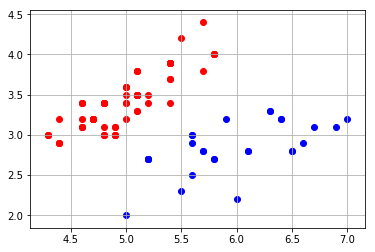

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.grid()

for i in range(len(data)) :
    point = data[i]
    if point[2] == 0 :
        color = 'r'  # setosas will appear in blue
    else:
        color = 'b'  # versicolor will appear in red
    
    plt.scatter(point[0], point[1], c=color);

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(url= 'https://farm9.staticflickr.com/8383/8675226902_e72273713f_k.jpg', width=400, height=400)

##### DEFINE TRAINING AND TESTING SETS

In [4]:
# split data into training and testing sets
train_data = data[:70]   # 70%
test_data = data[70:]    # 30%

##### DEFINE ACTIVATION FUNCTION AND ITS DERIVATIVE

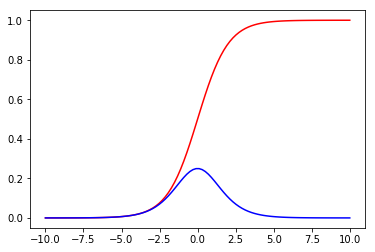

In [5]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

lin = np.linspace(-10, 10, 100)
plt.plot(lin, sigmoid(lin), c='r')
plt.plot(lin, sigmoid_p(lin), c='b');

##### TRAIN THE MODEL

In [6]:
cost_list = []
learning_rate = 0.2
epoch = 10

# iniciate the weights and the bias with random numbers
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(1000000):
    # choose a random item
    ri = np.random.randint(len(train_data))
    point = train_data[ri]
    
    z = point[0] * w1 + point[1] * w2 + b
    prediction = sigmoid(z)
    
    target = point[2]
    
    # cost function
    cost = np.square(prediction - target)
    
    #derivative of the cost function
    dcost_prediction = 2 * (prediction -target)
    dprediction_dz = sigmoid_p(z)
    
    # the derivatives of the weights is the inputs values 
    # the derivative of the Bias is 1
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_db = 1
    
    # the slope of the cost function
    dcost_dz = dcost_prediction * dprediction_dz
    
    # the slope of the weights & bias
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_db
    
    # update the weights and bias
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    # store the change on the cost through every iteration
    if i % 10000 == 0 :
        cost_list.append(cost)
        
        # print evolution of the regression model
        print('Cost: {:06.5f}\tRegression: {:06.5f}(X1) + {:06.5f}(X2) + {:06.5f}'.format(cost, w1, w2, b))

Cost: 0.97803	Regression: 1.08784(X1) + -0.42207(X2) + 0.66150
Cost: 0.00007	Regression: 4.62993(X1) + -7.94335(X2) + -0.83523
Cost: 0.00000	Regression: 5.30276(X1) + -9.11686(X2) + -1.06804
Cost: 0.00002	Regression: 5.80513(X1) + -9.81304(X2) + -1.17997
Cost: 0.00000	Regression: 6.09216(X1) + -10.36841(X2) + -1.28042
Cost: 0.00474	Regression: 6.32037(X1) + -10.81397(X2) + -1.35682
Cost: 0.00106	Regression: 6.54085(X1) + -11.13072(X2) + -1.40807
Cost: 0.00000	Regression: 6.73232(X1) + -11.40151(X2) + -1.44892
Cost: 0.00000	Regression: 6.88853(X1) + -11.66445(X2) + -1.48790
Cost: 0.00000	Regression: 7.01594(X1) + -11.89999(X2) + -1.52679
Cost: 0.00004	Regression: 7.12111(X1) + -12.11745(X2) + -1.56127
Cost: 0.00000	Regression: 7.22322(X1) + -12.30871(X2) + -1.59089
Cost: 0.00056	Regression: 7.34791(X1) + -12.46281(X2) + -1.61237
Cost: 0.00000	Regression: 7.41975(X1) + -12.63193(X2) + -1.64063
Cost: 0.00000	Regression: 7.53350(X1) + -12.76203(X2) + -1.65641
Cost: 0.00000	Regression: 7.61

##### VISUALIZE MODEL IMPROVEMENT

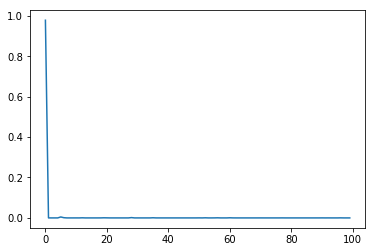

In [7]:
plt.plot(cost_list);

##### MAKE PREDICTIONS

In [8]:
def predictor(feature1, feature2):
    logit = (feature1 * w1) + (feature2 * w2) + b
    prediction = sigmoid(logit)
    return prediction

for i in range(len(test_data)) :
    point = test_data[i]
    prediction = predictor(point[0], point[1])
    prediction  = int(round(prediction))
    
    print('Input: {}, {}\t\tRealValue vs Prediction: {} - {}'.format(point[0], point[1], prediction, int(point[2])))

Input: 5.6, 3.0		RealValue vs Prediction: 1 - 1
Input: 5.1, 3.3		RealValue vs Prediction: 0 - 0
Input: 5.9, 3.2		RealValue vs Prediction: 1 - 1
Input: 5.1, 3.8		RealValue vs Prediction: 0 - 0
Input: 4.3, 3.0		RealValue vs Prediction: 0 - 0
Input: 5.1, 3.8		RealValue vs Prediction: 0 - 0
Input: 5.2, 2.7		RealValue vs Prediction: 1 - 1
Input: 5.0, 3.2		RealValue vs Prediction: 0 - 0
Input: 5.2, 3.5		RealValue vs Prediction: 0 - 0
Input: 5.0, 3.6		RealValue vs Prediction: 0 - 0
Input: 5.6, 3.0		RealValue vs Prediction: 1 - 1
Input: 5.5, 4.2		RealValue vs Prediction: 0 - 0
Input: 5.0, 3.5		RealValue vs Prediction: 0 - 0
Input: 6.1, 2.8		RealValue vs Prediction: 1 - 1
Input: 6.5, 2.8		RealValue vs Prediction: 1 - 1
Input: 5.1, 3.5		RealValue vs Prediction: 0 - 0
Input: 6.0, 2.2		RealValue vs Prediction: 1 - 1
Input: 5.2, 3.4		RealValue vs Prediction: 0 - 0
Input: 4.9, 3.1		RealValue vs Prediction: 0 - 0
Input: 4.4, 3.2		RealValue vs Prediction: 0 - 0
Input: 6.3, 3.3		RealValue vs Prediction